# --------------------------Analysis Part -1------------------------------------

In [68]:
%matplotlib inline

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Files

In [70]:
lending=pd.read_csv("./group assignment/loan.csv",encoding = 'unicode_escape')
print(lending.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Checking Duplicate values

In [71]:
lending=lending.drop_duplicates(keep='first', inplace=False)
print(lending.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB
None


# Removing more than 30 % (only one column) + 50% Rest missing values column

In [72]:
print(lending.isna().sum()/len(lending.index))
limitPer = len(lending) * .70
lending_clean = lending.dropna(thresh=limitPer,axis=1)
print(lending_clean.isna().sum()/len(lending.index))

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

# Removing Rows having Missing values

In [73]:
lending_clean = lending_clean.dropna(axis=0)
lending_clean=lending_clean.reset_index(drop=True)
print(lending_clean.info())
print(lending_clean.isna().sum()/len(lending.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431 entries, 0 to 36430
Data columns (total 53 columns):
id                            36431 non-null int64
member_id                     36431 non-null int64
loan_amnt                     36431 non-null int64
funded_amnt                   36431 non-null int64
funded_amnt_inv               36431 non-null float64
term                          36431 non-null object
int_rate                      36431 non-null object
installment                   36431 non-null float64
grade                         36431 non-null object
sub_grade                     36431 non-null object
emp_title                     36431 non-null object
emp_length                    36431 non-null object
home_ownership                36431 non-null object
annual_inc                    36431 non-null float64
verification_status           36431 non-null object
issue_d                       36431 non-null object
loan_status                   36431 non-null object
pymnt_pl

In [74]:
print(lending_clean.head())
print(len(lending_clean.columns))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500           2500.0   60 months   
1  1076863    1277178      10000        10000          10000.0   36 months   
2  1075358    1311748       3000         3000           3000.0   60 months   
3  1075269    1311441       5000         5000           5000.0   36 months   
4  1069639    1304742       7000         7000           7000.0   60 months   

  int_rate  installment grade sub_grade    ...    last_pymnt_amnt  \
0   15.27%        59.83     C        C4    ...             119.66   
1   13.49%       339.31     C        C1    ...             357.48   
2   12.69%        67.79     B        B5    ...              67.79   
3    7.90%       156.46     A        A4    ...             161.03   
4   15.96%       170.08     C        C5    ...            1313.76   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             Sep-13               

In [75]:
lending_clean1=lending_clean.drop(['id','member_id','url'],axis=1)
print(len(lending_clean1.columns))

50


# Dropping columns where we have only 1 unique value

In [76]:
lending_clean2=lending_clean1.drop(lending_clean1.columns[lending_clean1.apply(lambda col: col.nunique()==1)], axis=1)
print(len(lending_clean2.columns))
print(lending_clean2.columns)

41
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


# Removing % Character from Numbers + Dropping title columns

In [77]:
from datetime import datetime
lending_clean2['int_rate']=lending_clean2.int_rate.apply(lambda x: float( x.strip('%')))
lending_clean2['revol_util']=lending_clean2.revol_util.apply(lambda x: float(x.strip('%')))
lending_clean2=lending_clean2.drop(["emp_title","title"],axis=1)
print(lending_clean2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431 entries, 0 to 36430
Data columns (total 39 columns):
loan_amnt                  36431 non-null int64
funded_amnt                36431 non-null int64
funded_amnt_inv            36431 non-null float64
term                       36431 non-null object
int_rate                   36431 non-null float64
installment                36431 non-null float64
grade                      36431 non-null object
sub_grade                  36431 non-null object
emp_length                 36431 non-null object
home_ownership             36431 non-null object
annual_inc                 36431 non-null float64
verification_status        36431 non-null object
issue_d                    36431 non-null object
loan_status                36431 non-null object
purpose                    36431 non-null object
zip_code                   36431 non-null object
addr_state                 36431 non-null object
dti                        36431 non-null float64
delinq

# ------------------------Analysis Part - 2---------------------------------

# Univariate Analysis for Continuous Variable + creating of derived variable (Business + Data + Order)

In [78]:
# First 5 Continius variable
lend=lending_clean2.describe()
lending_clean2.describe().ix[:,0:5]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,11032.933491,10601.876895,12.073891,326.187642
std,7433.904309,7166.520054,7072.645601,3.734857,207.390058
min,500.000000,500.000000,0.000000,5.420000,16.080000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000
50%,10000.000000,10000.000000,9203.371902,11.860000,283.280000
75%,15000.000000,15000.000000,14508.774540,14.650000,432.220000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000


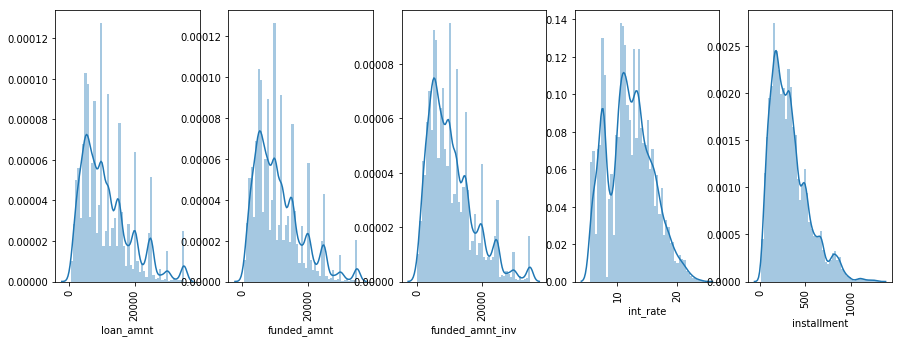

In [79]:
import seaborn as sns
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=90)
    sns.distplot(lending_clean2[lend.columns[i]])


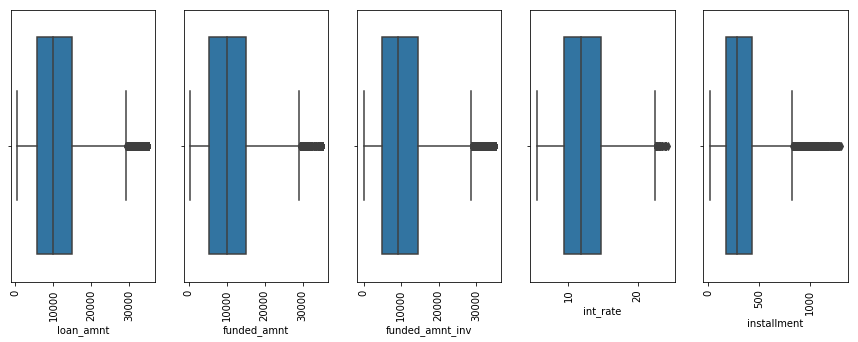

In [80]:
import seaborn as sns
plt.figure(figsize=(15,5))

for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=90)
    sns.boxplot(lending_clean2[lend.columns[i]])
      

In [81]:
# Next 5 Continious variables
lending_clean2.describe().ix[:,5:10]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc
count,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000
mean,6.930694e+04,13.444293,0.146139,0.864840,9.351679
std,6.354376e+04,6.643417,0.492211,1.063383,4.373724
min,4.000000e+03,0.000000,0.000000,0.000000,2.000000
25%,4.200000e+04,8.360000,0.000000,0.000000,6.000000
50%,6.000000e+04,13.540000,0.000000,1.000000,9.000000
75%,8.300000e+04,18.690000,0.000000,1.000000,12.000000
max,6.000000e+06,29.990000,11.000000,8.000000,44.000000


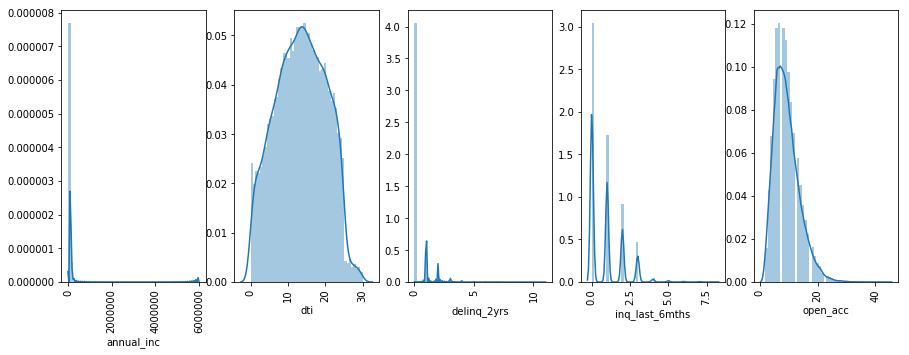

In [82]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=90)
    sns.distplot(lending_clean2[lend.columns[i]])

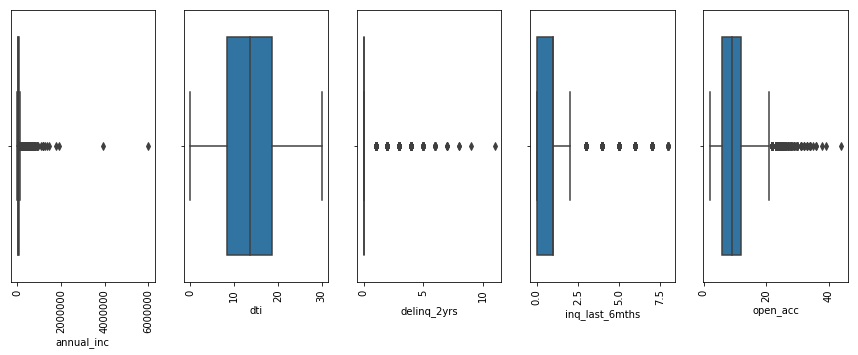

In [83]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=90)
    sns.boxplot(lending_clean2[lend.columns[i]])

In [84]:
# For better understanding creating new variable based on Data Type of delinq_2yrs_flag i.e 0- No deliquency and 1- Deliquency
lending_clean2['delinq_2yrs_flag']=lending_clean2['delinq_2yrs'].apply(lambda x: "1" if x >0 else "0")

#As the distribution of Annual Income is highly skewed and uneven so converting to categorical.
lending_clean2['annual_inc'].quantile([0.25,0.5,0.75])
lending_clean2['annual_inc_flag']=lending_clean2['annual_inc'].apply(lambda x: "0" if x <= 42000  else ("1" if(x <= 83000 and x > 42000) else "2"))


In [85]:
# Next 5 Continuous variables
lending_clean2.describe().ix[:,10:15]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,pub_rec,revol_bal,revol_util,total_acc,out_prncp
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,0.053663,13466.188740,49.276069,22.246137,52.468572
std,0.234897,15702.347369,28.192248,11.376630,379.861072
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,3832.000000,26.100000,14.000000,0.000000
50%,0.000000,9031.000000,49.900000,21.000000,0.000000
75%,0.000000,17231.500000,72.700000,29.000000,0.000000
max,4.000000,149588.000000,99.900000,90.000000,6311.470000


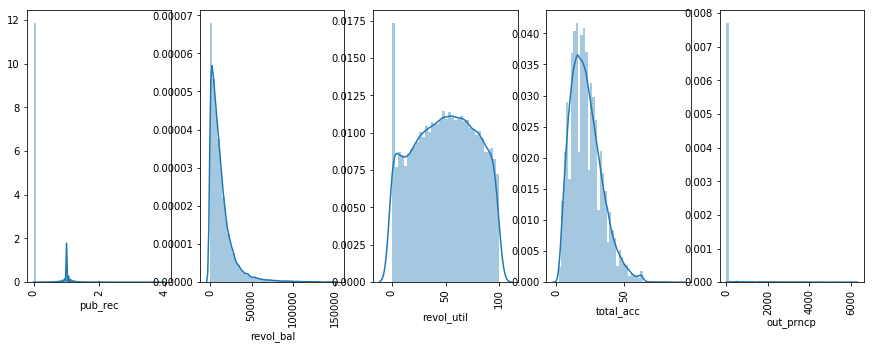

In [86]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=90)
    sns.distplot(lending_clean2[lend.columns[i]])

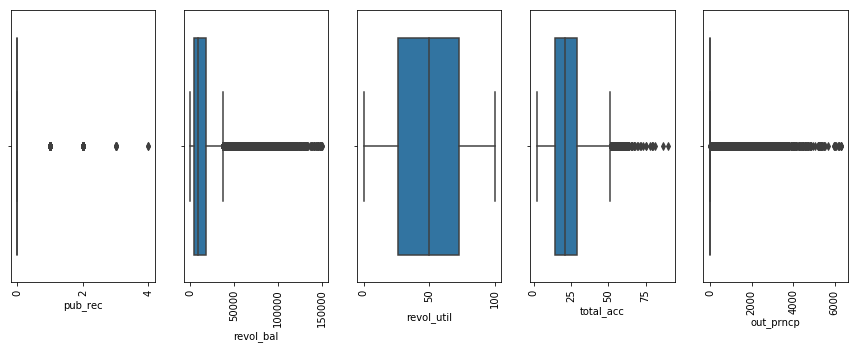

In [87]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=90)
    sns.boxplot(lending_clean2[lend.columns[i]])

In [88]:
# For better understanding creating new variable based on Data Type of pub_rec_flag i.e 0-Clean and 1- Risky
lending_clean2['pub_rec_flag']=lending_clean2['pub_rec'].apply(lambda x: "1" if x >0 else "0")
#For better understanding creating new variable based on Data Type of prncp i.e 0- No prinicipal outstanding and 1- yes
lending_clean2['out_prncp_flag']=lending_clean2['out_prncp'].apply(lambda x: "1" if x >0 else "0")

In [89]:
# Next 5 continuous variables
lending_clean2.describe().ix[:,15:20]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,52.216180,12311.226392,11841.691116,9912.631803,2304.442520
std,378.454016,9048.552965,8911.170172,7053.310578,2629.598904
min,0.000000,33.730000,0.000000,0.000000,6.220000
25%,0.000000,5672.634184,5413.880000,4800.000000,678.030000
50%,0.000000,10101.589360,9632.410000,8123.600000,1379.820000
75%,0.000000,16700.865405,16094.780000,14000.000000,2891.865000
max,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000


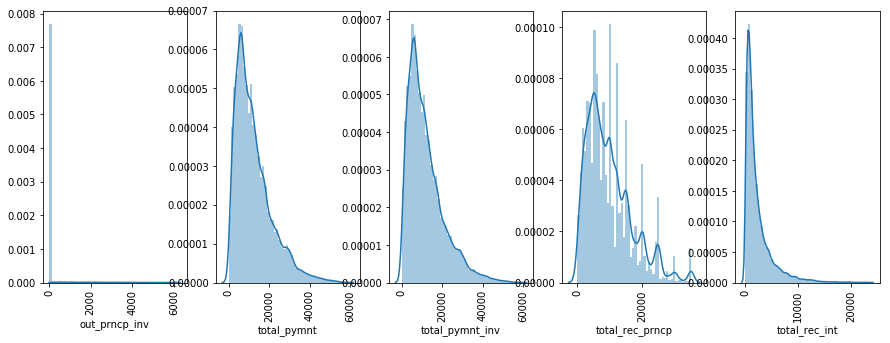

In [90]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=90)
    sns.distplot(lending_clean2[lend.columns[i]])

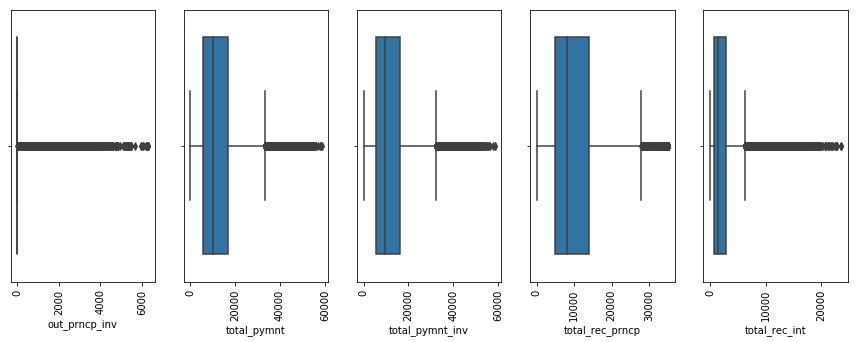

In [91]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=90)
    sns.boxplot(lending_clean2[lend.columns[i]])

In [92]:
#For better understanding creating new variable based on Data Type of prncp_inv i.e 0- No prinicipal outstanding and 1- yes
lending_clean2['out_prncp_inv_flag']=lending_clean2['out_prncp_inv'].apply(lambda x: "1" if x >0 else "0")

In [93]:
# Last 5 variables
lending_clean2.describe().ix[:,20:25]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,1.299912,92.852238,11.677622,2743.075381,0.041366
std,7.065817,682.064837,140.884174,4473.621163,0.200100
min,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,0.000000,0.000000,226.310000,0.000000
50%,0.000000,0.000000,0.000000,571.700000,0.000000
75%,0.000000,0.000000,0.000000,3457.620000,0.000000
max,180.200000,29623.350000,7002.190000,36115.200000,2.000000


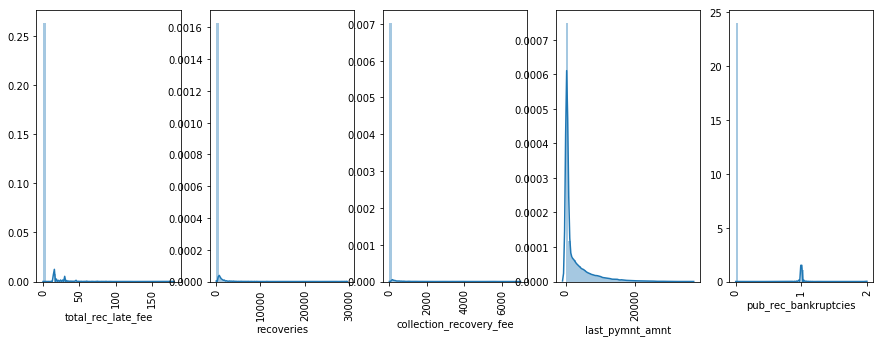

In [94]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=90)
    sns.distplot(lending_clean2[lend.columns[i]])

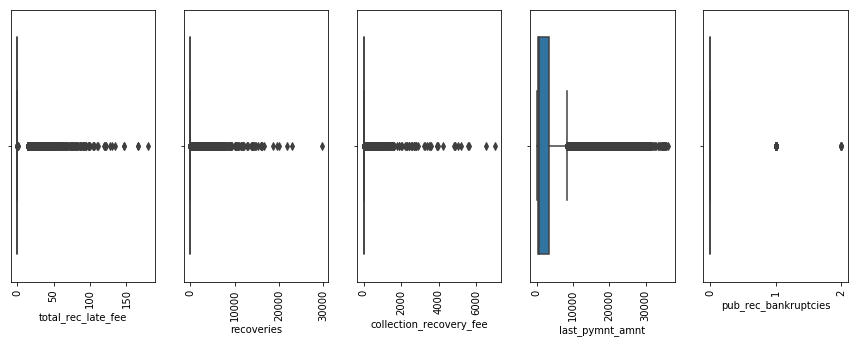

In [95]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=90)
    sns.boxplot(lending_clean2[lend.columns[i]])

In [96]:
lending_clean2['total_rec_late_fee_flag']=lending_clean2['total_rec_late_fee'].apply(lambda x: "1" if x >0 else "0")
lending_clean2['recoveries_flag']=lending_clean2['recoveries'].apply(lambda x: "1" if x >0 else "0")
lending_clean2['collection_recovery_fee_flag']=lending_clean2['collection_recovery_fee'].apply(lambda x: "1" if x >0 else "0")
lending_clean2['pub_rec_bankruptcies_flag']=lending_clean2['pub_rec_bankruptcies'].apply(lambda x: "1" if x >0 else "0")

In [30]:
# Pairplot
# sns.pairplot(lending_clean2[[*lend]])

In [31]:
# Corelation plot
# lending_clean2[[*lend]].corr()

# Univariate Analysis for Categorical Variable

In [97]:
lend_cat = lending_clean2.drop(lend.columns, axis=1)
print(lend_cat.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'delinq_2yrs_flag', 'annual_inc_flag', 'pub_rec_flag', 'out_prncp_flag',
       'out_prncp_inv_flag', 'total_rec_late_fee_flag', 'recoveries_flag',
       'collection_recovery_fee_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')


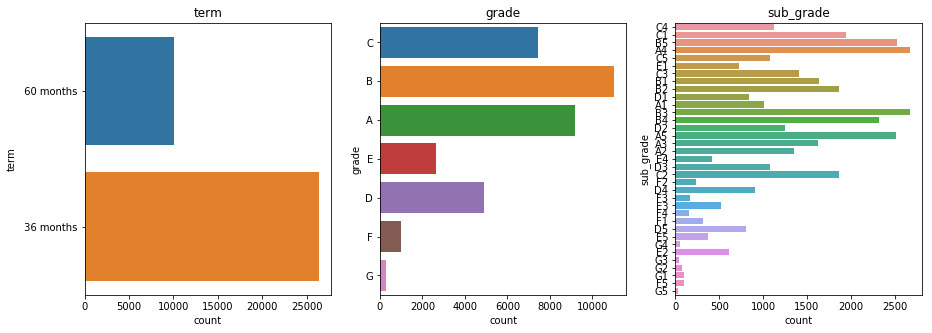

In [98]:
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    plt.title(lend_cat.columns[i])
    sns.countplot(y=lend_cat.columns[i], data=lend_cat)

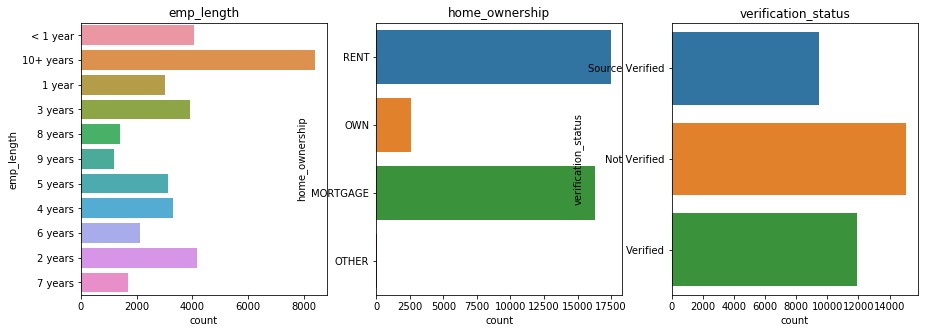

In [99]:
plt.figure(figsize=(15,5))
for i in range(3,6):
    plt.subplot(1, 3, i-2)
    plt.title(lend_cat.columns[i])
    sns.countplot(y=lend_cat.columns[i], data=lend_cat)

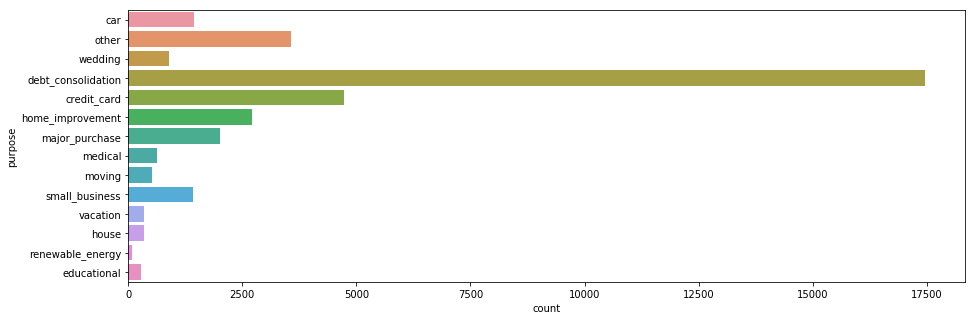

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(y=lend_cat.purpose, data=lend_cat)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

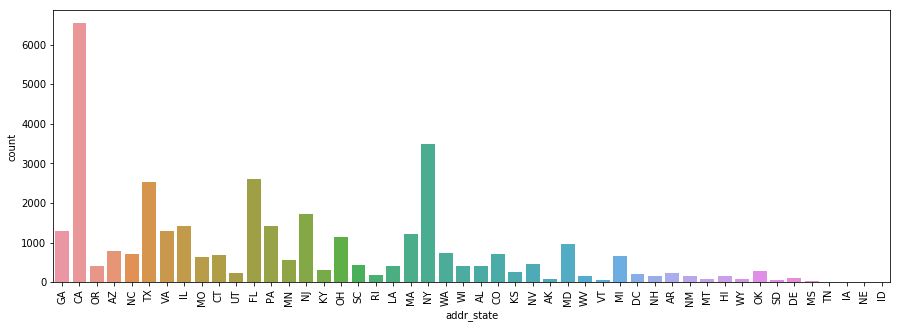

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x=lend_cat.addr_state, data=lend_cat)
plt.xticks(rotation=90)


In [37]:
# Plotting New categorical variables columns derived from continuous variables

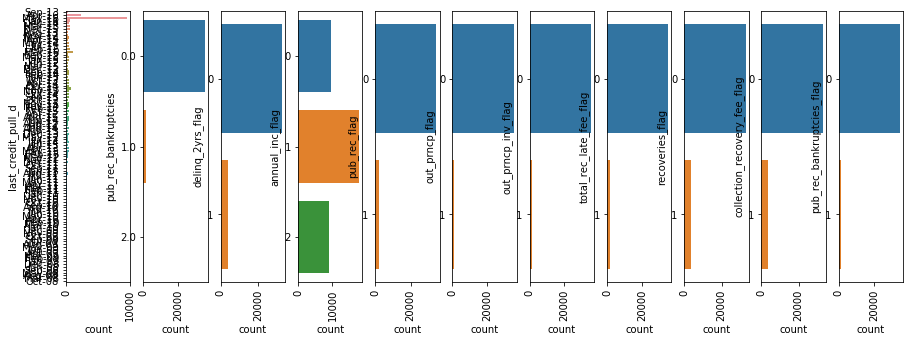

In [102]:
plt.figure(figsize=(15,5))
for i in range(37,48):
    plt.subplot(1, 11, i-36)
    sns.countplot(y=lending_clean2.columns[i], data=lending_clean2)
    plt.xticks(rotation=90)


# -------------------------------Analysis Part-3------------------------------

# Bivariate Analysis with Loan Status

In [103]:
#Converting to status 0 and 1.
lending_clean2['loan_status_cat']=lending_clean2['loan_status']
lending_clean2=lending_clean2.drop(["loan_status"],axis=1)
lending_clean2['loan_status']=lending_clean2['loan_status_cat'].apply(lambda x : "1" if x =="Charged Off" else "0")


# Continuous variables

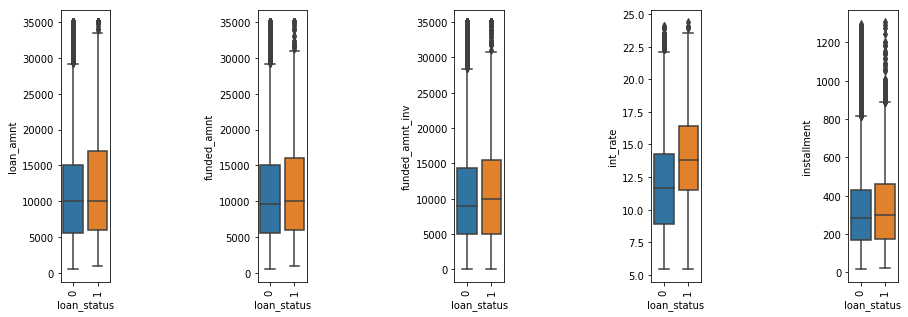

In [104]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=lending_clean2[lend.columns[i]],x=lending_clean2['loan_status'],data=lending_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

Note:From the above figure it was found that Int rate and installment have higher impact on Loan Status. Loan Amnt, Funded Amnt and Funded Amnt_inv have high corelation

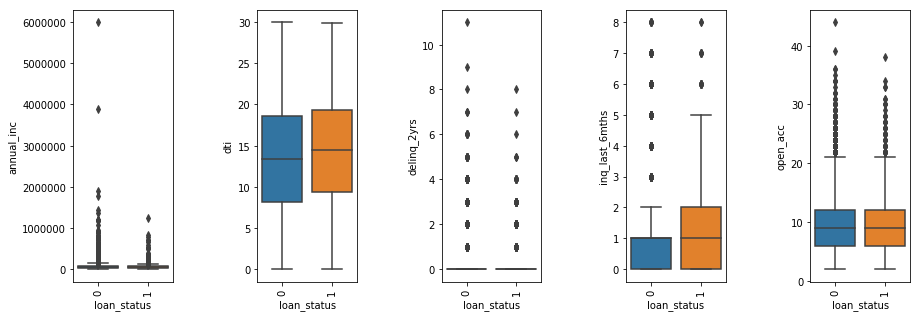

In [105]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    sns.boxplot(y=lending_clean2[lend.columns[i]],x=lending_clean2['loan_status'],data=lending_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.85, hspace=None)
    
#for first , third and fourt variable created flag    

Note:From the above figure it was found that dti and inq_last_6mnth have higher impact on Loan Status. For Annual income,delinu_2 yrs we have created bins and will be covered by Categorical Analysis. 

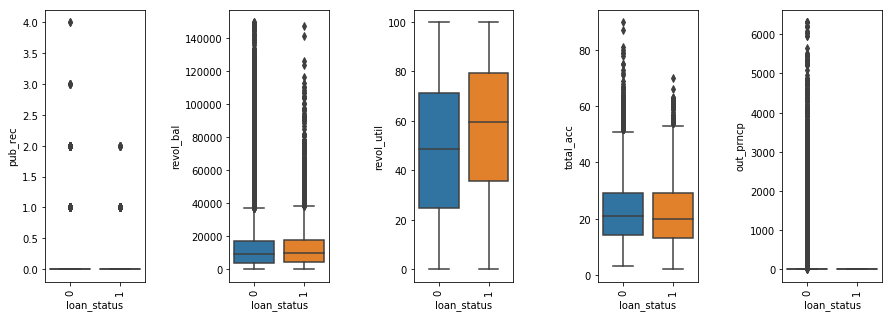

In [106]:
plt.figure(figsize=(15,5))

for i in range(10,15):
    plt.subplot(1, 5, i-9)
    sns.boxplot(y=lending_clean2[lend.columns[i]],x=lending_clean2['loan_status'],data=lending_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.85, hspace=None)
    
#Note:for first and last variable we have created flag.        

Note:From the above figure it was found that revol_util has higher impact on Loan Status. 

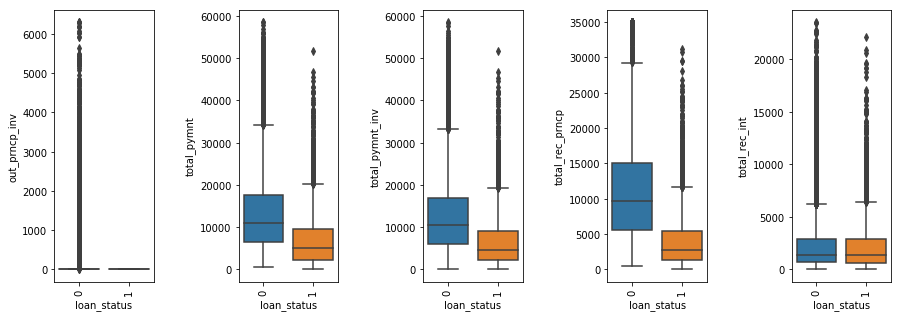

In [107]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    sns.boxplot(y=lending_clean2[lend.columns[i]],x=lending_clean2['loan_status'],data=lending_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.85, hspace=None)
    
#Note:for first variable we have created flag.    

Note:From the above figure it was found that Total Payement and Total_rec_princ have higher impact on Loan Status. As both the details we can obtain post loan disbursement we are not considering in Top 5.

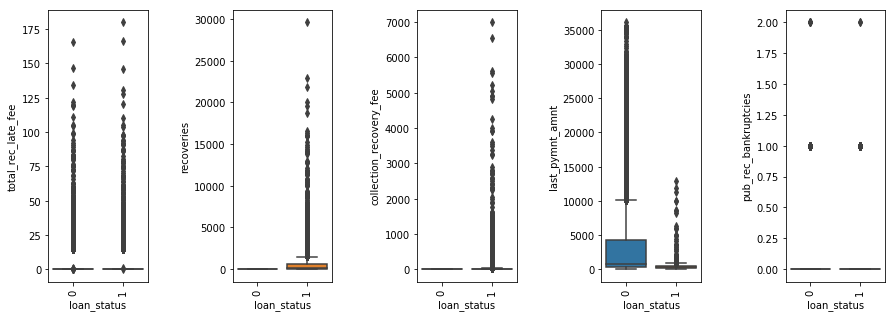

In [108]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    g=sns.boxplot(y=lending_clean2[lend.columns[i]],x=lending_clean2['loan_status'],data=lending_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.85, hspace=None)

#Note:for first 3 and last variable we have created flag.

Note:From the above figure it was found that recoveries and last payment have higher impact on Loan Status. As both the details we can obtain post loan disbursement we are not considering in Top 5.

In [45]:
# categorical new flag variables 

In [109]:
from scipy.stats import chi2_contingency
print(chi2_contingency(pd.crosstab(lending_clean2.delinq_2yrs_flag,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.delinq_2yrs_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(6.571597101425523, 0.01036189251830996, 1, array([[28077.42515989,  4406.57484011],
       [ 3411.57484011,   535.42515989]]))


loan_status,0,1
delinq_2yrs_flag,,
0,0.865965,0.134035
1,0.851026,0.148974


Note:From the above matrix it was found that Total delinq_2yrs and Loan Status are dependent, but the percentage change is less. Not considering.

In [110]:
print(pd.crosstab(lending_clean2.out_prncp_flag,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.out_prncp_flag,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.out_prncp_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

loan_status         0     1
out_prncp_flag             
0               30423  4942
1                1066     0
(171.15517119904672, 4.1387620150175713e-39, 1, array([[30567.60684582,  4797.39315418],
       [  921.39315418,   144.60684582]]))


loan_status,0,1
out_prncp_flag,,
0,0.860257,0.139743
1,1.000000,0.000000


Note:From the above matrix it was found that Total out_prncp_flag and Loan Status are dependent, but due to post disbursement property we are not considering in top 5.

loan_status          0     1
annual_inc_flag             
0                 8034  1611
1                15334  2390
2                 8121   941
(159.29970792783746, 2.5615800903297e-35, 2, array([[ 8336.62004886,  1308.37995114],
       [15319.6737943 ,  2404.3262057 ],
       [ 7832.70615684,  1229.29384316]]))


<Figure size 1080x360 with 0 Axes>

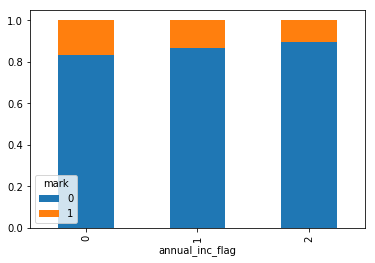

In [111]:
plt.figure(figsize=(15,5))
print(pd.crosstab(lending_clean2.annual_inc_flag,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.annual_inc_flag,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.annual_inc_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that annual_inc_flag and Loan Status are dependent, considering for top 5 analysis.

In [112]:
print(chi2_contingency(pd.crosstab(lending_clean2.out_prncp_inv_flag,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.out_prncp_inv_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(171.15517119904672, 4.1387620150175713e-39, 1, array([[30567.60684582,  4797.39315418],
       [  921.39315418,   144.60684582]]))


loan_status,0,1
out_prncp_inv_flag,,
0,0.860257,0.139743
1,1.000000,0.000000


Note:From the above matrix it was found that Total out_prncp_inv_flag and Loan Status are dependent, but due to post disbursement property we are not considering in top 5.

In [113]:
print(pd.crosstab(lending_clean2.total_rec_late_fee_flag,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.total_rec_late_fee_flag,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.total_rec_late_fee_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

loan_status                  0     1
total_rec_late_fee_flag             
0                        30427  4189
1                         1062   753
(1267.635332774832, 1.2206352843124916e-277, 1, array([[29920.21146826,  4695.78853174],
       [ 1568.78853174,   246.21146826]]))


loan_status,0,1
total_rec_late_fee_flag,,
0,0.878987,0.121013
1,0.585124,0.414876


Note:From the above matrix it was found that Total rec_late_fee_flag and Loan Status are dependent, but due to post disbursement property we are not considering in top 5.

In [114]:
print(pd.crosstab(lending_clean2.recoveries_flag,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.recoveries_flag,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.recoveries_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

loan_status          0     1
recoveries_flag             
0                31489  1215
1                    0  3727
(26445.447097234708, 0.0, 1, array([[28267.58134556,  4436.41865444],
       [ 3221.41865444,   505.58134556]]))


loan_status,0,1
recoveries_flag,,
0,0.962849,0.037151
1,0.000000,1.000000


Note:From the above matrix it was found that recovery_flag and Loan Status are dependent, but due to post disbursement property we are not considering in top 5.

In [115]:
print(pd.crosstab(lending_clean2.collection_recovery_fee_flag,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.collection_recovery_fee_flag,lending_clean2.loan_status)))
print(pd.crosstab(lending_clean2.collection_recovery_fee_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1))

loan_status                       0     1
collection_recovery_fee_flag             
0                             31489  1610
1                                 0  3332
(23359.660703923815, 0.0, 1, array([[28608.99813346,  4490.00186654],
       [ 2880.00186654,   451.99813346]]))
loan_status                          0         1
collection_recovery_fee_flag                    
0                             0.951358  0.048642
1                             0.000000  1.000000


Note:From the above matrix it was found that Total collection_recovery_fee_flag and Loan Status are dependent, but due to post disbursement property we are not considering in top 5.

(69.19158742582417, 8.934834430395601e-17, 1, array([[30192.48055228,  4738.51944772],
       [ 1296.51944772,   203.48055228]]))


<Figure size 1080x360 with 0 Axes>

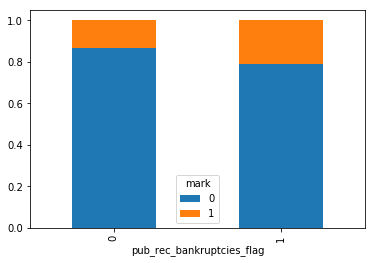

In [116]:
plt.figure(figsize=(15,5))
print(chi2_contingency(pd.crosstab(lending_clean2.pub_rec_bankruptcies_flag,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.pub_rec_bankruptcies_flag,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that pub_rec_bank_flag and Loan Status are dependent,  considering for top 5 analysis.

loan_status      0     1
term                    
 36 months   23646  2729
 60 months    7843  2213
(843.1422079227771, 2.2514997020326636e-185, 1, array([[22797.13362246,  3577.86637754],
       [ 8691.86637754,  1364.13362246]]))


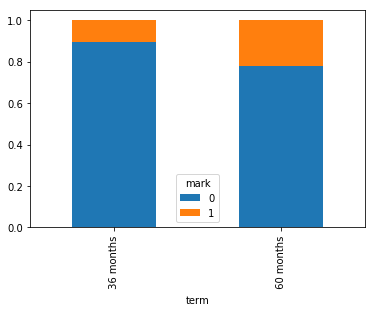

In [117]:
print(pd.crosstab(lending_clean2.term,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.term,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.term,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that term and Loan Status are dependent, considering for top 5 analysis.

loan_status     0     1
grade                  
A            8662   513
B            9782  1253
C            6261  1169
D            3894   980
E            2002   648
F             683   286
G             205    93
(1308.4579071814187, 1.5985739448609166e-279, 6, array([[7930.37728857, 1244.62271143],
       [9538.06140375, 1496.93859625],
       [6422.09299772, 1007.90700228],
       [4212.8238588 ,  661.1761412 ],
       [2290.51769098,  359.48230902],
       [ 837.55156323,  131.44843677],
       [ 257.57519695,   40.42480305]]))


<Figure size 1080x360 with 0 Axes>

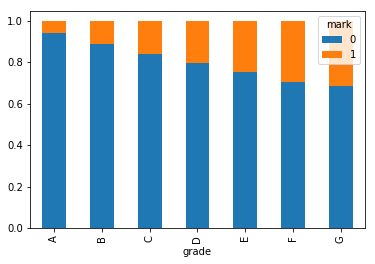

In [118]:
plt.figure(figsize=(15,5))
print(pd.crosstab(lending_clean2.grade,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.grade,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.grade,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that grade and Loan Status are dependent, considering for top 5 analysis.

In [119]:
print(chi2_contingency(pd.crosstab(lending_clean2.sub_grade,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.sub_grade,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(1417.043985270614, 3.87032453166905e-276, 34, array([[ 868.66802997,  136.33197003],
       [1172.05358074,  183.94641926],
       [1408.88446653,  221.11553347],
       [2310.39765584,  362.60234416],
       [2170.37355549,  340.62644451],
       [1420.12096841,  222.87903159],
       [1616.32757816,  253.67242184],
       [2311.26200214,  362.73799786],
       [2004.41906618,  314.58093382],
       [2185.93178886,  343.06821114],
       [1684.61093574,  264.38906426],
       [1616.32757816,  253.67242184],
       [1215.27089567,  190.72910433],
       [ 970.6608932 ,  152.3391068 ],
       [ 935.22269496,  146.77730504],
       [ 730.37262222,  114.62737778],
       [1076.11114161,  168.88885839],
       [ 931.76530976,  146.23469024],
       [ 782.23340013,  122.76659987],
       [ 692.34138508,  108.65861492],
       [ 630.10845159,   98.89154841],
       [ 523.79385688,   82.20614312],
       [ 446.00269002,   69.99730998],
       [ 365.61848426,   57.38151574],
       [ 324.9942

loan_status,0,1
sub_grade,,
A1,0.977114,0.022886
A2,0.953540,0.046460
A3,0.950920,0.049080
A4,0.940890,0.059110
A5,0.924731,0.075269
B1,0.914181,0.085819
B2,0.897861,0.102139
B3,0.885191,0.114809
B4,0.877965,0.122035


Note:From the above matrix it was found that sub grade and Loan Status are dependent, but due to presence of grades not considering for top 5 analysis.

In [120]:
print(chi2_contingency(pd.crosstab(lending_clean2.emp_length,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.emp_length,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(17.414811680629022, 0.06567454717999019, 10, array([[2615.51189921,  410.48810079],
       [7266.55933134, 1140.44066866],
       [3609.51014246,  566.48985754],
       [3383.05141226,  530.94858774],
       [2849.7497461 ,  447.2502539 ],
       [2704.53956795,  424.46043205],
       [1833.27849908,  287.72150092],
       [1466.79566852,  230.20433148],
       [1214.40654937,  190.59345063],
       [1043.26598227,  163.73401773],
       [3502.33120145,  549.66879855]]))


loan_status,0,1
emp_length,,
1 year,0.865169,0.134831
10+ years,0.853337,0.146663
2 years,0.873563,0.126437
3 years,0.866888,0.133112
4 years,0.870488,0.129512
5 years,0.865133,0.134867
6 years,0.864686,0.135314
7 years,0.853860,0.146140
8 years,0.864057,0.135943


Note:From the above matrix it was found that emp_length and Loan Status are independent, not considering for top 5 analysis.

In [121]:
print(chi2_contingency(pd.crosstab(lending_clean2.home_ownership,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.home_ownership,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(24.980385438160972, 1.55869935866093e-05, 3, array([[1.40871160e+04, 2.21088403e+03],
       [8.12485521e+01, 1.27514479e+01],
       [2.22569172e+03, 3.49308281e+02],
       [1.50949438e+04, 2.36905624e+03]]))


loan_status,0,1
home_ownership,,
MORTGAGE,0.873543,0.126457
OTHER,0.808511,0.191489
OWN,0.865631,0.134369
RENT,0.855875,0.144125


Note:From the above matrix it was found that house ownership and Loan Status are independent, not considering for top 5 analysis.

In [122]:
print(chi2_contingency(pd.crosstab(lending_clean2.verification_status,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.verification_status,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(82.59167321323606, 1.1626420764059871e-18, 2, array([[13011.86917735,  2042.13082265],
       [ 8168.93686695,  1282.06313305],
       [10308.1939557 ,  1617.8060443 ]]))


loan_status,0,1
verification_status,,
Not Verified,0.882490,0.117510
Source Verified,0.860121,0.139879
Verified,0.844793,0.155207


Note:From the above matrix it was found that verification and Loan Status are independent, not considering for top 5 analysis.

loan_status             0     1
purpose                        
car                  1294   149
credit_card          4247   479
debt_consolidation  14960  2508
educational           231    45
home_improvement     2409   296
house                 291    52
major_purchase       1818   190
medical               539    95
moving                450    79
other                3029   546
renewable_energy       73    15
small_business       1058   356
vacation              287    49
wedding               803    83
(304.8327562611808, 2.342690296810268e-57, 13, array([[1.24725171e+03, 1.95748291e+02],
       [4.08490061e+03, 6.41099393e+02],
       [1.50984011e+04, 2.36959886e+03],
       [2.38559578e+02, 3.74404216e+01],
       [2.33805674e+03, 3.66943263e+02],
       [2.96470780e+02, 4.65292196e+01],
       [1.73560737e+03, 2.72392633e+02],
       [5.47995553e+02, 8.60044468e+01],
       [4.57239192e+02, 7.17608081e+01],
       [3.09003802e+03, 4.84961983e+02],
       [7.60624743e+01, 1.19375

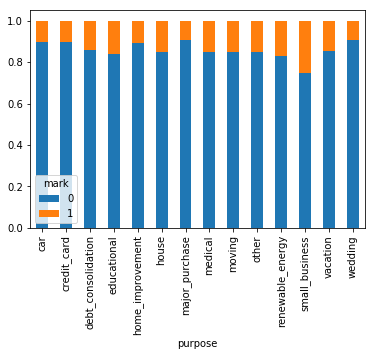

In [123]:
print(pd.crosstab(lending_clean2.purpose,lending_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lending_clean2.purpose,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.purpose,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that purpose and Loan Status are dependent, considering for top 5 analysis.

(135.75837160250418, 1.4986003333688494e-10, 47, array([[6.48259724e+01, 1.01740276e+01],
       [3.56975021e+02, 5.60249787e+01],
       [1.94477917e+02, 3.05220828e+01],
       [6.76783152e+02, 1.06216848e+02],
       [5.64936741e+03, 8.86632593e+02],
       [6.11092833e+02, 9.59071670e+01],
       [5.86026790e+02, 9.19732096e+01],
       [1.78055337e+02, 2.79446625e+01],
       [9.16207076e+01, 1.43792924e+01],
       [2.26112992e+03, 3.54870083e+02],
       [1.11587107e+03, 1.75128929e+02],
       [1.39159754e+02, 2.18402459e+01],
       [8.64346298e-01, 1.35653702e-01],
       [2.59303890e+00, 4.06961105e-01],
       [1.23255782e+03, 1.93442178e+02],
       [2.15222228e+02, 3.37777717e+01],
       [2.64489967e+02, 4.15100327e+01],
       [3.44009827e+02, 5.39901732e+01],
       [1.05623118e+03, 1.65768823e+02],
       [8.41873295e+02, 1.32126705e+02],
       [5.67011172e+02, 8.89888282e+01],
       [4.86626966e+02, 7.63730340e+01],
       [5.39352090e+02, 8.46479097e+01],
       [

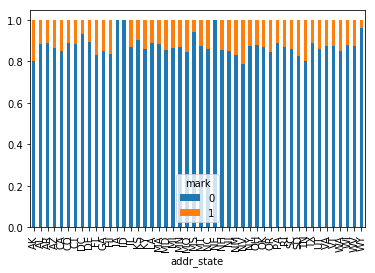

In [124]:
print(chi2_contingency(pd.crosstab(lending_clean2.addr_state,lending_clean2.loan_status)))
ct=pd.crosstab(lending_clean2.addr_state,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Note:From the above matrix it was found that address and Loan Status are dependent, considering for top 5 analysis.

In [125]:
print(chi2_contingency(pd.crosstab(lending_clean2.zip_code,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.zip_code,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(1028.8437154463566, 1.156491153800867e-07, 804, array([[ 0.8643463 ,  0.1356537 ],
       [77.79116686, 12.20883314],
       [12.10084818,  1.89915182],
       ...,
       [18.15127227,  2.84872773],
       [ 8.64346298,  1.35653702],
       [ 0.8643463 ,  0.1356537 ]]))


loan_status,0,1
zip_code,,
007xx,1.000000,0.000000
010xx,0.855556,0.144444
011xx,0.928571,0.071429
012xx,0.928571,0.071429
013xx,0.785714,0.214286
014xx,0.793103,0.206897
015xx,0.844828,0.155172
016xx,0.956522,0.043478
017xx,0.942857,0.057143


Note:Not considering as full information is  not available

In [63]:
# issued Date/Month Analysis

In [126]:
lending_clean2.issue_d_mnth=lending_clean2.issue_d.apply(lambda x: x[-3:])
print(chi2_contingency(pd.crosstab(lending_clean2.issue_d_mnth,lending_clean2.loan_status)))
pd.crosstab(lending_clean2.issue_d_mnth,lending_clean2.loan_status).apply(lambda r: r/r.sum(), axis=1)

(44.998238508316966, 3.979314326534397e-09, 4, array([[3.45738519e+00, 5.42614806e-01],
       [9.10156652e+02, 1.42843348e+02],
       [3.82300368e+03, 5.99996322e+02],
       [9.33061829e+03, 1.46438171e+03],
       [1.74217640e+04, 2.73423601e+03]]))


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


loan_status,0,1
issue_d,,
-07,0.750000,0.250000
-08,0.848053,0.151947
-09,0.877685,0.122315
-10,0.878740,0.121260
-11,0.854584,0.145416


Note: Not much impact for Issue Date , not considering for top 5.

# ---------------------Analysis part- 4---------------------------

# Does Revol_util has co relation with other considered features like Interest Rate , Installment, dti ,bankruptcies 

In [127]:
lending_clean2.groupby('loan_status')[['int_rate','installment','dti','pub_rec_bankruptcies','revol_util']].mean()

,int_rate,installment,dti,pub_rec_bankruptcies,revol_util
loan_status,,,,,
0,11.782528,324.205962,13.331804,0.037886,48.195377
1,13.930376,338.814334,14.161042,0.063537,56.161926


# Does Revol_util has co relation with other considered features like term

In [128]:
lending_clean2.groupby('term')[['revol_util']].mean()

,revol_util
term,
36 months,48.065098
60 months,52.452220


# Does Revol_util has co relation with other considered features like grades

In [129]:
lending_clean2.groupby('grade')[['revol_util']].mean()

,revol_util
grade,
A,30.189006
B,46.871027
C,56.829573
D,63.184754
E,68.048166
F,70.137564
G,75.414094


Note 1: Compared to other variables like installments, dti, bankrupt, int_rate and term, revol_util has the same property and a major key indicator.


Note 2: Rev_util has the same behaviour as the grades, both have the same behaviour with loan status from previous plots i.e. increasing revol_util and poor grades have higher Defaults. So finally considered revol_util as key indicator. 

# Based on the behaviour and Independent nature of all atributes to wards Loan Status we have decided to below mentioned variables in Top 5
# 1.rev util 
# 2.inq_6 month
# 3.annual income
# 4.purpose
# 5.address_state
